1. What is PyTorch?

PyTorch is an open-source deep learning framework developed by Facebook AI Research.
It’s used to build and train neural networks easily and efficiently, using dynamic computation graphs.

💡 Key Concepts

Tensor: Like a NumPy array but with GPU acceleration.

Autograd: Automatic differentiation (gradient computation).

In [1]:
import torch

# Create tensors (like numpy arrays)
x = torch.tensor([2.0, 3.0], requires_grad=True)
w = torch.tensor([4.0, 5.0], requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Compute a simple linear function: y = w · x + b
y = w @ x + b   # same as (4*2 + 5*3 + 1)
print("y =", y.item())  # 4*2 + 5*3 + 1 = 25.0

# Backpropagation example
y.backward()   # compute gradients

print("dy/dw =", w.grad)  # ∂y/∂w = x
print("dy/db =", b.grad)  # ∂y/∂b = 1


y = 24.0
dy/dw = tensor([2., 3.])
dy/db = tensor(1.)


**#Linear Regression Example (from scratch)**

This shows PyTorch’s autograd system — it automatically computes gradients for you.

In [2]:
#Linear Regression Example (from scratch)

# Step 1: Generate Data
import torch

# Generate simple data: y = 2x + 1
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + 0.5 * torch.randn(X.shape)  # add small noise

In [3]:
#Step 2: Define Model Parameters
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
lr = 0.01  # learning rate

In [4]:
#Step 3: Training Loop
for epoch in range(500):
    y_pred = w * X + b               # forward pass
    loss = ((y_pred - y)**2).mean()  # mean squared error

    loss.backward()  # compute gradients
    with torch.no_grad():  # update weights
        w -= lr * w.grad
        b -= lr * b.grad
    w.grad.zero_()
    b.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss={loss.item():.4f}, w={w.item():.2f}, b={b.item():.2f}")

Epoch 0: loss=94.7528, w=1.73, b=-0.69
Epoch 100: loss=0.4650, w=2.14, b=0.06
Epoch 200: loss=0.2877, w=2.08, b=0.47
Epoch 300: loss=0.2222, w=2.04, b=0.72
Epoch 400: loss=0.1980, w=2.02, b=0.88


## Building the Same Model with torch.nn

PyTorch provides higher-level APIs to simplify models.

In [5]:
import torch.nn as nn
import torch.optim as optim

# Model: y = w*x + b
model = nn.Linear(1, 1)  # 1 input → 1 output

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        w, b = model.parameters()
        print(f"Epoch {epoch}: loss={loss.item():.4f}")


Epoch 0: loss=207.7847
Epoch 100: loss=0.4369
Epoch 200: loss=0.2773
Epoch 300: loss=0.2183
Epoch 400: loss=0.1965


In [6]:
#A Simple Neural Network for XOR
import torch
import torch.nn as nn
import torch.optim as optim

# XOR data
X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = torch.tensor([[0.],[1.],[1.],[0.]])

# Define a small MLP
class XOR_Net(nn.Module):
    def __init__(self):
        super(XOR_Net, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # hidden layer
        self.fc2 = nn.Linear(2, 1)  # output layer

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

model = XOR_Net()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train
for epoch in range(5000):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: loss={loss.item():.4f}")

with torch.no_grad():
    print("\nPredictions:")
    print(torch.round(model(X)))


Epoch 0: loss=0.8238
Epoch 1000: loss=0.6932
Epoch 2000: loss=0.6931
Epoch 3000: loss=0.6930
Epoch 4000: loss=0.6929

Predictions:
tensor([[1.],
        [1.],
        [0.],
        [0.]])


ValueError: x and y must be the same size

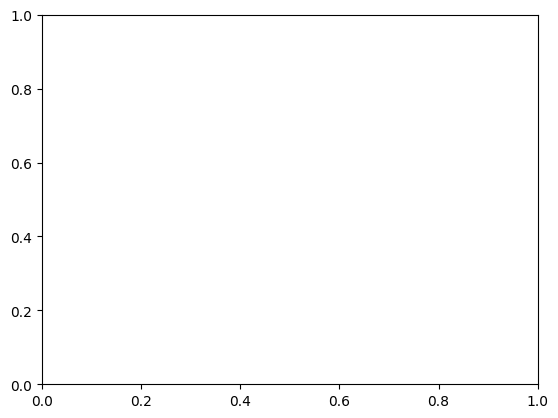

In [7]:
#Simple Visualization
import matplotlib.pyplot as plt

plt.scatter(X.numpy(), y.numpy(), label='True data')
plt.scatter(X.numpy(), model(X).detach().numpy(), label='Model prediction')
plt.legend()
plt.show()

Explanation:

1.torch – the main PyTorch library, providing tensors (like NumPy arrays but with

GPU support) and automatic differentiation.

2. torch.nn – provides modules and layers to build neural networks.
Example: nn.Linear, nn.ReLU, nn.Conv2d, etc.

3. torch.optim – provides optimization algorithms (like SGD, Adam) that update the network weights during training.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Example: Simple Neural Network
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # 2 inputs -> 1 output

    def forward(self, x):
        return self.linear(x)

# Create model
model = SimpleModel()

# Dummy data
inputs = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
targets = torch.tensor([[5.0], [11.0]])

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

print("Final Loss:", loss.item())


Final Loss: 0.0916605070233345


Explanation:

class SimpleModel(nn.Module):

Defines a custom neural network by inheriting from torch.nn.Module.

Every PyTorch model must extend nn.Module.

def __init__(self):

The constructor initializes layers (the architecture).

super(SimpleModel, self).__init__()

Calls the parent (nn.Module) constructor, necessary for PyTorch to register layers properly.

self.linear = nn.Linear(2, 1)

Adds a fully connected (dense) layer.

Input dimension = 2, output dimension = 1.

Internally, PyTorch initializes:

Weight matrix W of size [1, 2]

Bias b of size [1]

def forward(self, x):

Defines how data flows through the network (the computation logic).

In this case, the input x is passed through one linear layer:

𝑦 = 𝑊 × 𝑥 + 𝑏

y=W×x+b

PyTorch automatically calls this forward() when you run model(inputs).

model = SimpleModel()

Explanation:

Instantiates the neural network defined above.

Internally, it initializes weights and biases randomly.

You can see parameters using list(model.parameters()).

Dummy Data Creation

inputs = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
targets = torch.tensor([[5.0], [11.0]])

Explanation:

Creates 2 training samples:

Input features: [1, 2] and [3, 4]

Target outputs: 5 and 11

Each input has 2 features, so it matches the model’s input size nn.Linear(2,1).

The data type is torch.FloatTensor (default float32).

Define Loss Function & Optimizer


criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Explanation:

Loss Function (criterion)

nn.MSELoss() = Mean Squared Error Loss.

Measures the difference between model predictions and target values:

L=1/N  ​∑(ypred​−ytrue​)^2


Optimizer

optim.SGD = Stochastic Gradient Descent.

It updates weights to minimize the loss function.

model.parameters() gives all trainable parameters (weights + biases).

lr=0.01 means the learning rate, controlling how big a step we take during each update.


for epoch in range(100):

Loop runs for 100 epochs (training iterations).

Each epoch means the model sees all training samples once.

optimizer.zero_grad()

PyTorch accumulates gradients by default.

This command resets gradients to zero before computing new ones.
Otherwise, they’d keep adding up from previous steps.


outputs = model(inputs)

Runs the forward pass:

Passes inputs through forward() → linear(x)

Produces predicted values y_pred.

🔹 loss = criterion(outputs, targets)

Computes the loss value (scalar).

Compares predictions outputs with actual targets.

Example:
If output = [4.8, 10.9], target = [5.0, 11.0],
MSE loss ≈ 0.02 (very small, means good fit).

This small example demonstrates the core logic of any deep learning training loop:

1.Build model

2. Feed data

3. Compute loss

4. Backpropagate gradients

5. Update weights

6. Repeat until loss is small